# 快速傅里叶变换

## 频率域的信息

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

plt.style.use(['ggplot','../../presentation.mplstyle'])

构造带有两个频率的信号

In [2]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

傅里叶变换

In [3]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

展示频率域信息，可以清楚地看到两个频率信息。

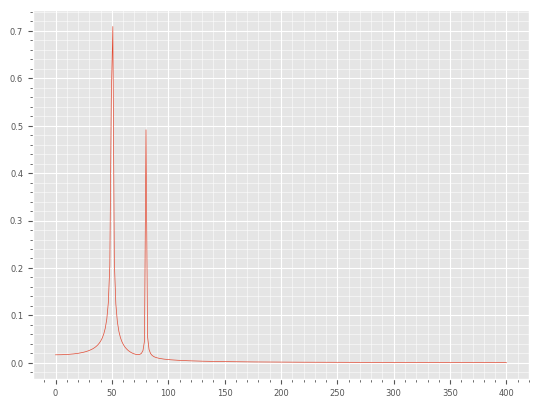

In [4]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.grid(zorder=0)
ax.grid(which='major', color='white', linestyle='-',alpha=1)
ax.grid(which='minor', color='white', linestyle='-',alpha=0.5)
plt.minorticks_on()
plt.show()

## 低通滤波器
[The Discrete Algebra
of the Fourier Transform](https://mathematical-tours.github.io/daft-sources/DAFT-EN.pdf), chapter 4, exercise 41:
1. Builds a vector $f$, of size $N$, such that the filter $\Phi^f$ keeps the low
frequencies $N/2$, and removes the $N/2$ high frequencies.
2. Represent with great precision the continuous Fourier transform of the impulse response $f$ (in other
words the frequency response of the filter). What do we see?
3. Considering a less brutal cut in the conserved / rejected frequencies, go back to the previous questions and comment on the results. In particular, imagine a family of filters $f_\epsilon$, $\epsilon\in[0,1]$, with a sharp cutoff for $\epsilon=0$ and soft for $\epsilon=1$.

### 低通滤波器设计之一：频率域简单的截断函数
函数`filter_pass_bas(N)`: $N$为信号的长度，在频率域上定义以下的截断函数$H(v)$，

$$
H(v)=\left\{
\begin{array}{cc}
1,& |v|\leq\frac{\pi}{2}\\
0,& |v|>\frac{\pi}{2}
\end{array}
\right.
$$
如果是用数组的指针，上述$|v|\leq\pi/2$相对应于$v\leq N/4$和$v\geq 3N/4$。

**注意**，在程序中，高频部分是在序列的中间，两头是低频部分。我们在数组的两头取$1$, 中间取$0$。用python中的list comprehansion实现。然后用傅里叶逆变换获取时间域上的滤波函数。

### 低通滤波器设计之二：截断函数的磨光


In [5]:
import math

def filter_pass_bas(N):
    v=[1 if (v<=N/4)|(v>=3*N/4) else 0 for v in range(0,N)]
    return np.real(np.fft.ifft(v))

def filter_parameterable(N,eps):
    #P1=math.floor(eps*N/4)
    P1=int((eps*N)//4)
    P=2*P1+1
    trans=[1]
    if P!=1:
        #ramp=np.arange(0,P)
        #trans=list(map(lambda x: (math.cos(math.pi*x/(P-1))+1)/2,ramp))
        trans=[(math.cos(math.pi*x/(P-1))+1)/2 for x in range(0,P)]
    ones = list(np.repeat(1,N/4-P1))
    x = ones+trans+list(np.repeat(0,N/2-P))
    trans.reverse()
    x = x+trans+ones[:-1]
    return np.real(np.fft.ifft(x))

def plot_function(ax,t,y,title='',color='#666666'):
    ax.minorticks_on()
    ax.plot(t,y,'--o',markevery=markers_on,linewidth=.5,markersize=2,color=color)
    ax.grid(zorder=0)
    ax.grid(which='major', color='white', linestyle='-',alpha=.5)
    ax.grid(which='minor', color='white', linestyle='-',alpha=0.25)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_title(title,size=8,color='#888888')

In [6]:
leps=[0,.3,.7]
N=32
P=1024

In [7]:
c=list(range(int(N/2),N))+list(range(0,int(N/2)))
cc=list(range(P>>1,P))+list(range(0,P>>1))
t=list(np.arange(-N/2,N/2))
tt=[x*math.pi/(P-1) for x in np.arange(-P/2,P/2)]

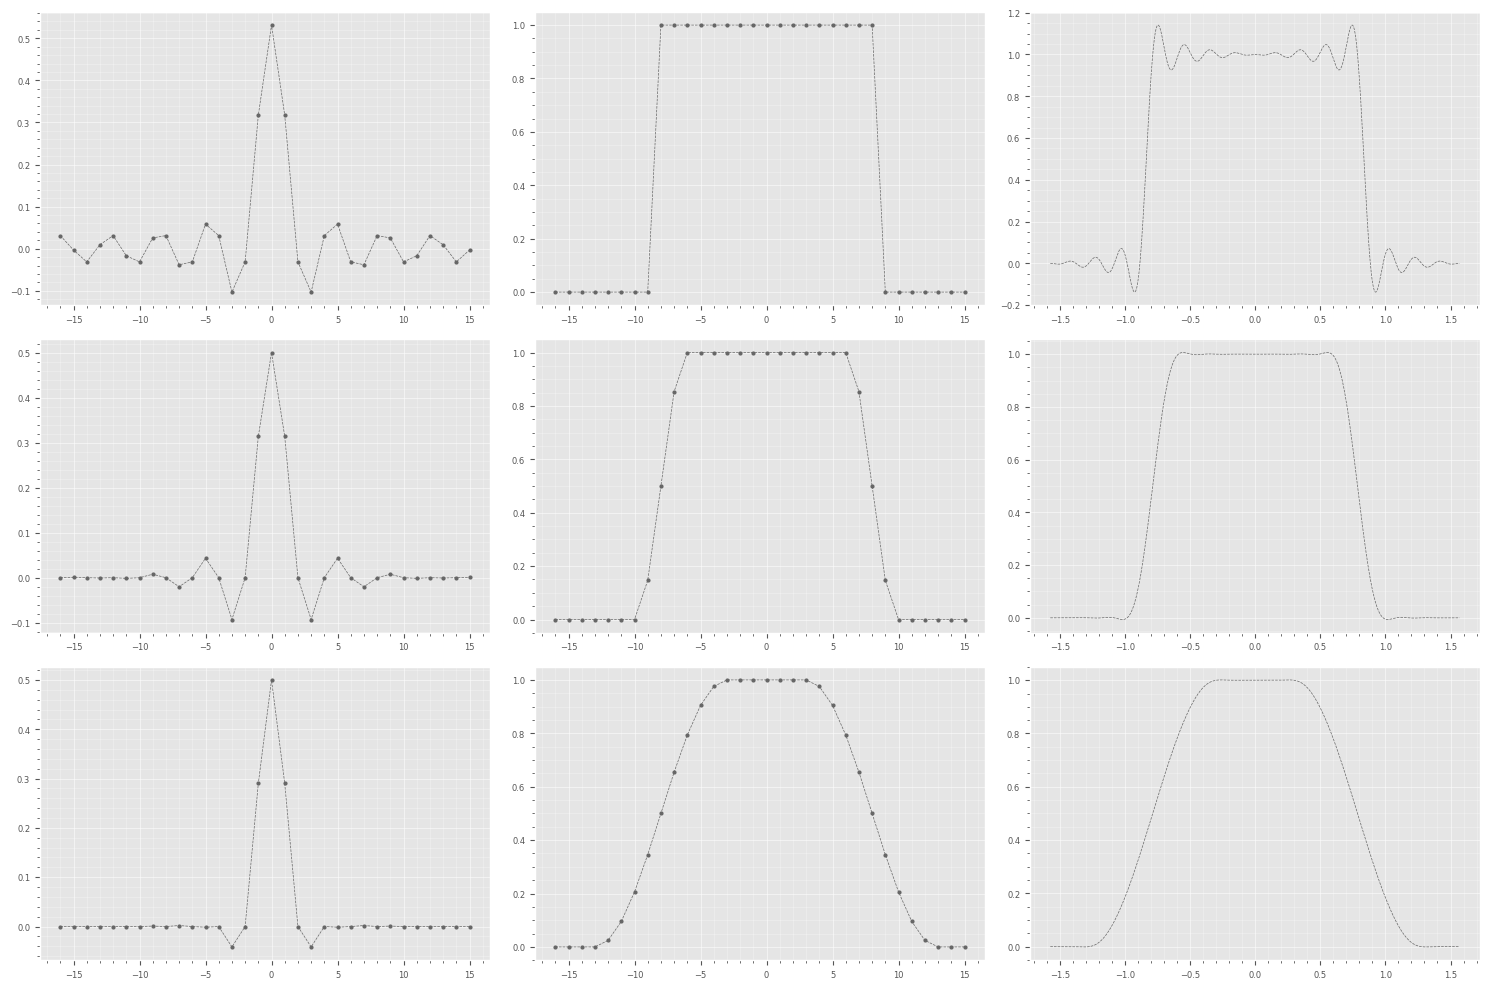

In [8]:
fig,axs = plt.subplots(len(leps),3,figsize=(15,10))
for i in range(len(leps)):
    markers_on = c
    y=filter_parameterable(N,leps[i])
    plot_function(axs[i,0],t,y[c])
    f=list(y)
    y=np.real(np.fft.fft(y))
    plot_function(axs[i,1],t,y[c])
    yy=f[0:int(N/2)]+list(np.repeat(0,P-N))+f[int(N/2):N]
    yy=np.real(np.fft.fft(yy))
    markers_on = []
    plot_function(axs[i,2],tt,yy[cc])
plt.tight_layout()

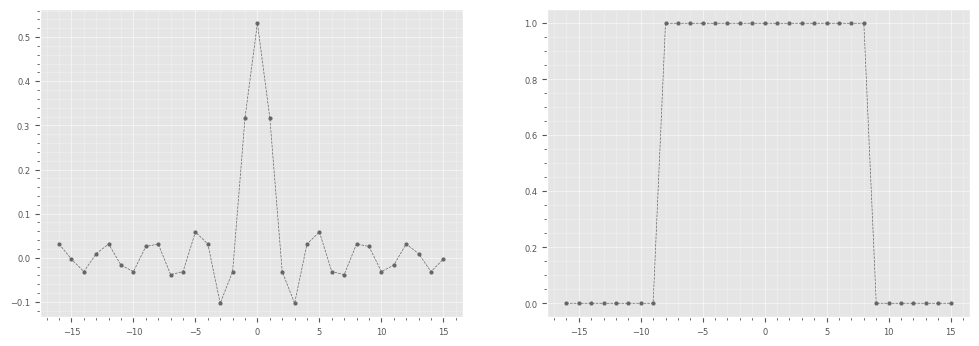

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
markers_on = c
y=filter_pass_bas(N)
plot_function(ax[0],t,y[c])
yy=np.append(y[0:int(N/2)],list(np.repeat(0,P-N)))
yy=np.append(yy,y[int(N/2):N])
y=np.real(np.fft.fft(y))
plot_function(ax[1],t,y[c])

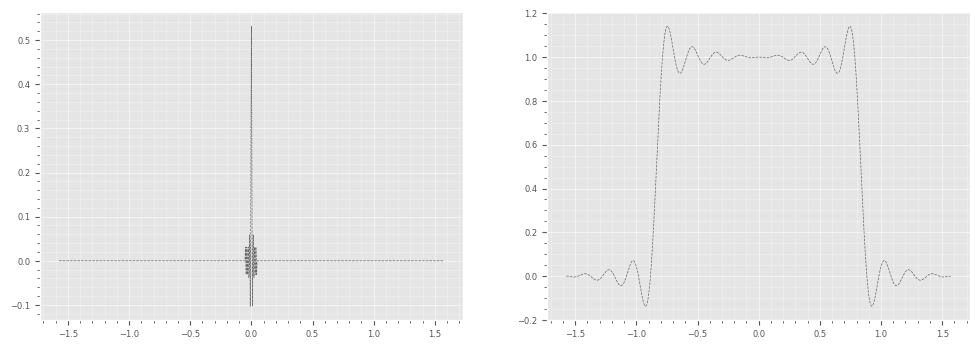

In [10]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
yyf=np.real(np.fft.fft(yy))
markers_on=[]
plot_function(ax[0],tt,yy[cc])
plot_function(ax[1],tt,yyf[cc])

In [11]:
y=filter_parameterable(N,leps[2])

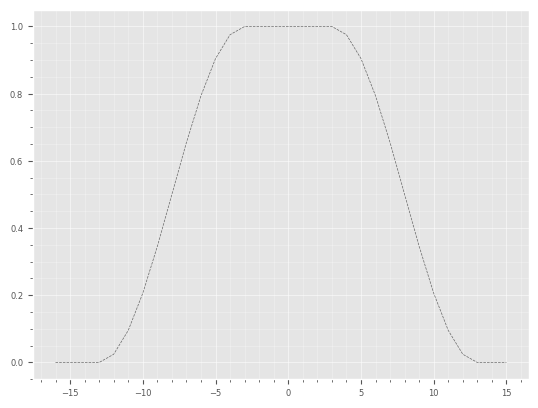

In [12]:
fig,ax=plt.subplots()
#plot_function(ax,t,y[c])
yf=np.real(np.fft.fft(y))
plot_function(ax,t,yf[c])